In [1]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt

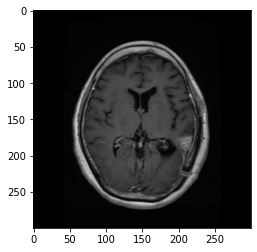

In [56]:
# Resolution
path = '/Users/james/MScCode/Final Project/Datasets/test_dataset_unprocessed'

saved = np.load(os.path.join(path,'features.npy'))

plt.imshow(saved[0].reshape(300,300,3))

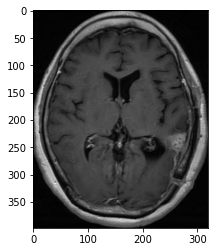

In [55]:
# Pixel loop - Working
img_org = Image.open("/Users/james/MScCode/Final Project/Datasets/test_dataset_unprocessed/Te-gl_0019.jpg")
img = img_org.convert("L")
pixels = img.load() # create the pixel map

for i in range(img.size[0]): # for every pixel:
    for j in range(img.size[1]):
        if pixels[i,j] != (25):
            # change to black if not red
            pixels[i,j] = (0)
            
bbox = img.getbbox()

cropped_im = img_org.crop(bbox)

# Save the cropped image
# cropped_im.save("cropped_image.jpg")

plt.imshow(cropped_im)